# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [4]:

df = pd.read_csv('C:\LHL\ml-project-unsupervised-learning\Wholesale_Data.csv')

In [5]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:

missing_values = df.isnull().sum()

print(missing_values)

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [7]:

df = df.dropna()

In [8]:

df = df.fillna(df.mean())

In [9]:

summary_stats = df.describe()
print(summary_stats)

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

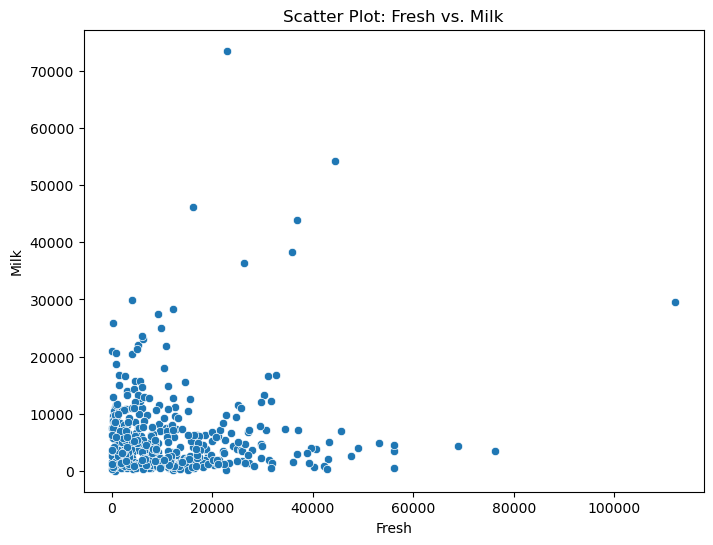

In [10]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Fresh', y='Milk')
plt.title('Scatter Plot: Fresh vs. Milk')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()

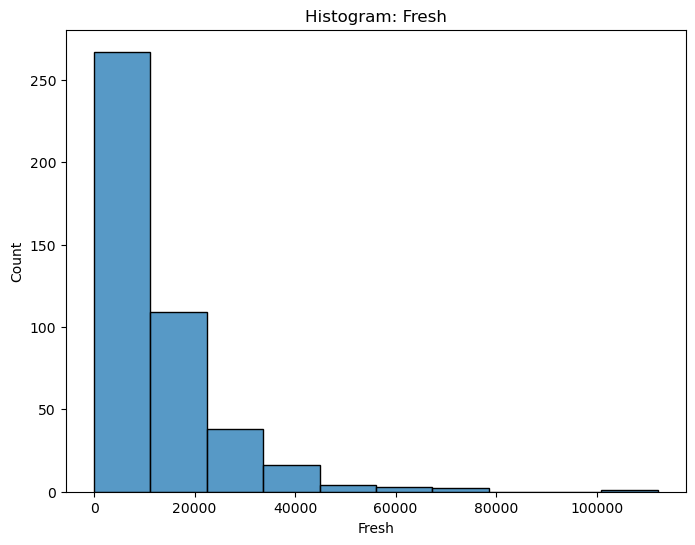

In [12]:

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Fresh', bins=10)
plt.title('Histogram: Fresh')
plt.xlabel('Fresh')
plt.ylabel('Count')
plt.show()

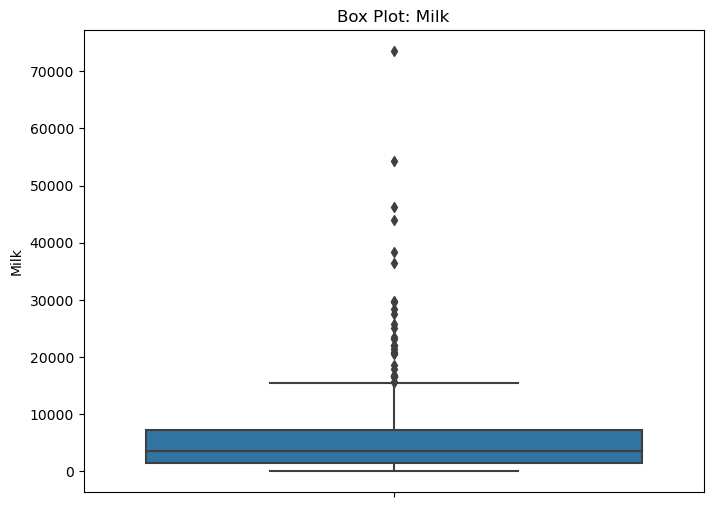

In [13]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Milk')
plt.title('Box Plot: Milk')
plt.ylabel('Milk')
plt.show()

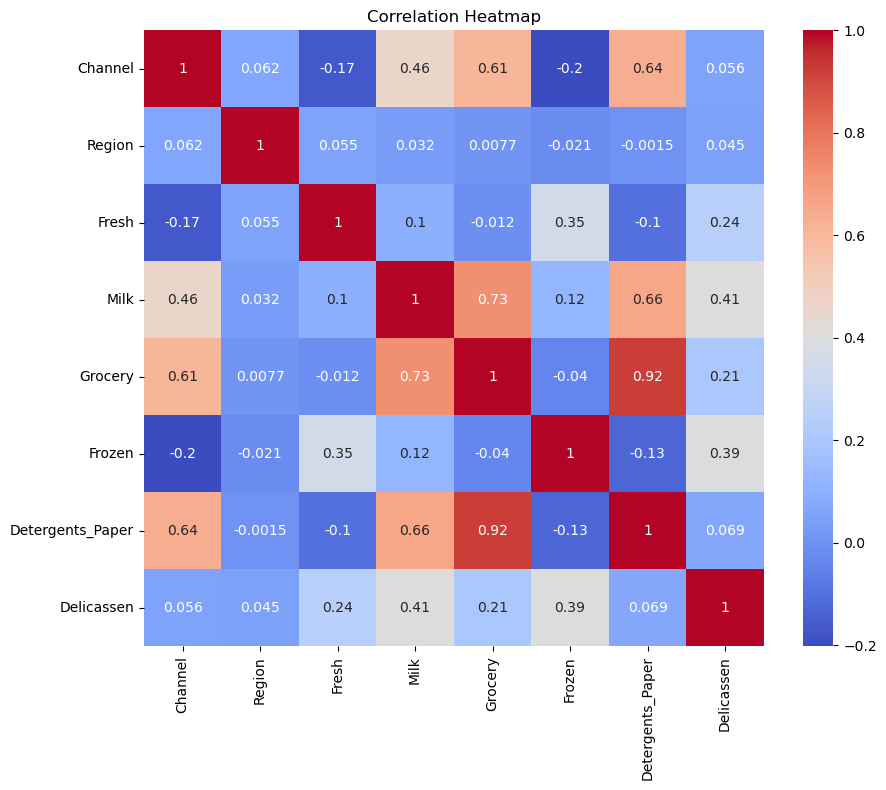

In [14]:

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

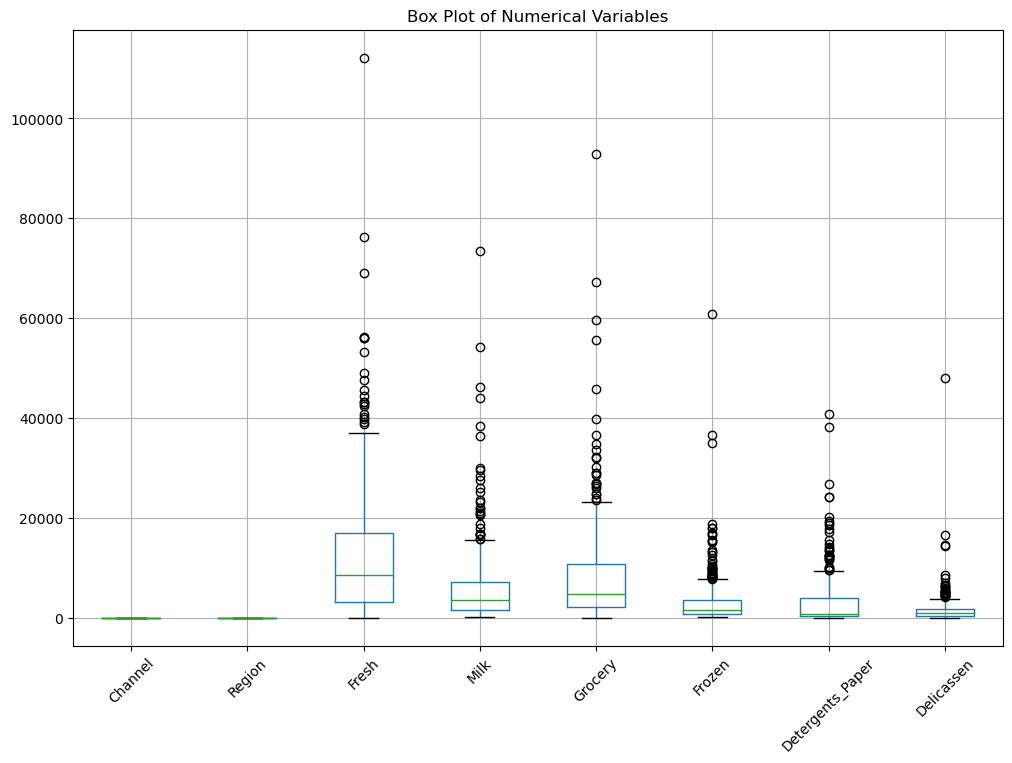

In [15]:

plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Box Plot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

In [16]:

z_scores = zscore(df.select_dtypes(include='number'))

outliers = (z_scores > 3).any(axis=1)
outlier_indices = df.index[outliers]

print("Outlier Indices:")
print(outlier_indices)

Outlier Indices:
Int64Index([ 23,  39,  47,  56,  61,  65,  71,  85,  86,  87,  92,  93, 103,
            125, 181, 183, 196, 211, 216, 251, 258, 259, 284, 325, 333, 413],
           dtype='int64')


In [17]:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_indices = df.index[outliers]

print("Outlier Indices:")
print(outlier_indices)

Outlier Indices:
Int64Index([  2,   4,  17,  22,  23,  24,  28,  29,  36,  38,
            ...
            406, 409, 411, 413, 425, 427, 431, 435, 436, 437],
           dtype='int64', length=108)


In [18]:

correlation_matrix = df[['Grocery', 'Detergents_Paper']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   Grocery  Detergents_Paper
Grocery           1.000000          0.924641
Detergents_Paper  0.924641          1.000000


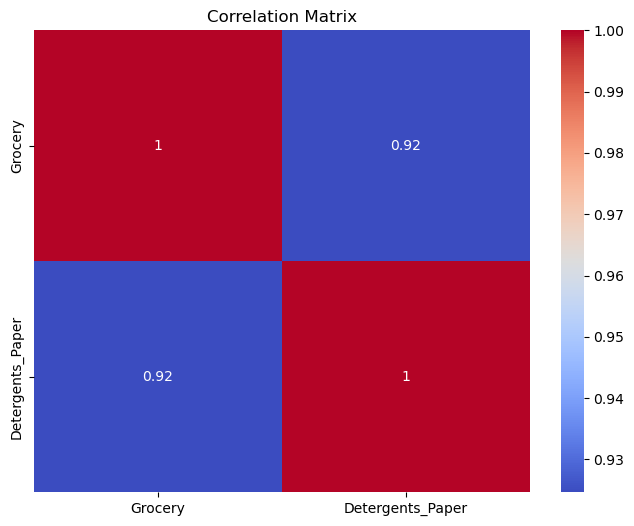

In [19]:

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
grocery_detergents_correlation = correlation_matrix.loc['Grocery', 'Detergents_Paper']
print("Correlation between Grocery and Detergents_Paper:", grocery_detergents_correlation)

Correlation between Grocery and Detergents_Paper: 0.9246406908542676


In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [22]:
from sklearn.decomposition import PCA


numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numeric_columns]


pca = PCA()
principal_components = pca.fit_transform(X)


explained_variance_ratio = pca.explained_variance_ratio_

feature_importance = pd.DataFrame({
    'Feature': numeric_columns,
    'Importance': pca.components_[0]
})


feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

            Feature  Importance
0           Channel    0.961309
6  Detergents_Paper    0.162909
4           Grocery    0.137603
1            Region    0.130175
3              Milk    0.103945
7        Delicassen    0.008648
5            Frozen   -0.033366
2             Fresh   -0.038379


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

c:\Users\moham\.conda\envs\test_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\moham\.conda\envs\test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\moham\.conda\envs\test_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\moham\.conda\envs\test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

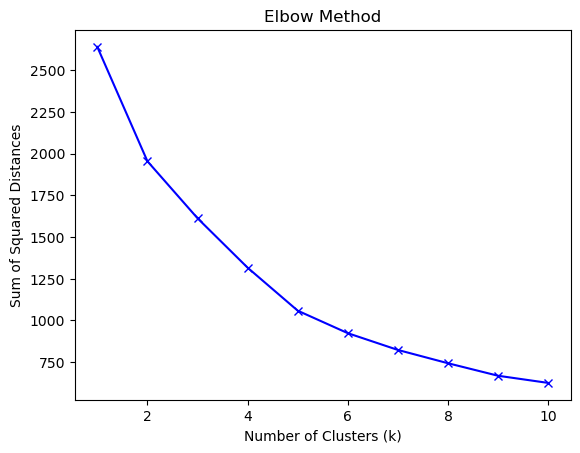

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

attributes = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


missing_attributes = set(attributes) - set(df.columns)
if missing_attributes:
    raise KeyError(f"The following attributes are missing in the DataFrame: {', '.join(missing_attributes)}")

X = df[attributes]


scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

sum_of_squared_distances = []
max_k = 10  # maximum number of clusters to consider
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_X)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(range(1, max_k + 1), sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [24]:
k = 4  # Optimal number of clusters determined from the elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_

centroids = kmeans.cluster_centers_

df['Cluster'] = labels

c:\Users\moham\.conda\envs\test_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\moham\.conda\envs\test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


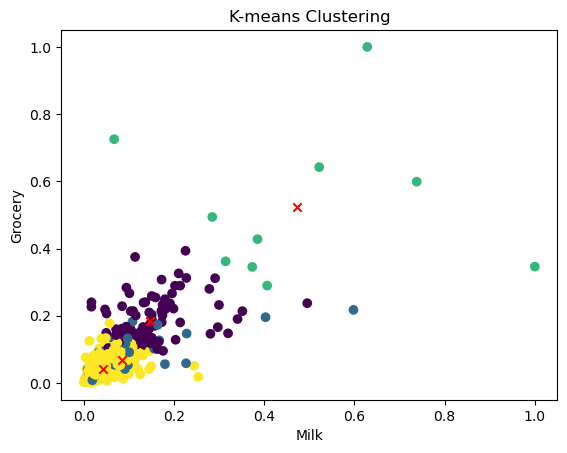

In [25]:

plt.scatter(X['Milk'], X['Grocery'], c=labels, cmap='viridis')
plt.scatter(centroids[:, 1], centroids[:, 2], c='red', marker='x')  
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('K-means Clustering')
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [26]:

from scipy.spatial.distance import pdist, squareform


dist_matrix = squareform(pdist(df, metric='euclidean'))

print(dist_matrix)

[[0.         0.06274669 0.15312258 ... 3.02577454 1.00940137 1.0129616 ]
 [0.06274669 0.         0.12961725 ... 3.02333819 1.01217638 1.01304797]
 [0.15312258 0.12961725 0.         ... 3.0275833  1.01724548 1.02319697]
 ...
 [3.02577454 3.02333819 3.0275833  ... 0.         3.20245493 3.20325551]
 [1.00940137 1.01217638 1.01724548 ... 3.20245493 0.         0.08174748]
 [1.0129616  1.01304797 1.02319697 ... 3.20325551 0.08174748 0.        ]]


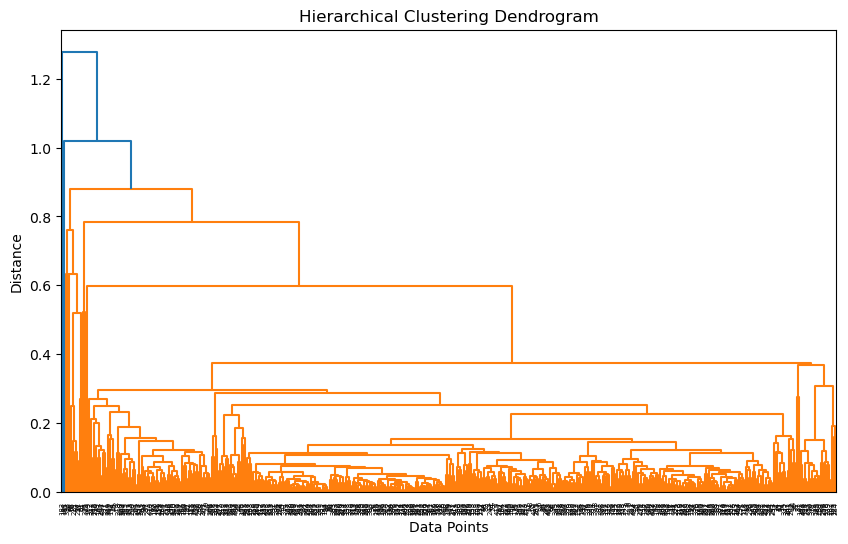

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 6))
Z = linkage(X, method='average', metric='euclidean')
dendrogram(Z)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(df)

transformed_data = pca.transform(df)

explained_variance_ratio = pca.explained_variance_ratio_
principal_components = pca.components_

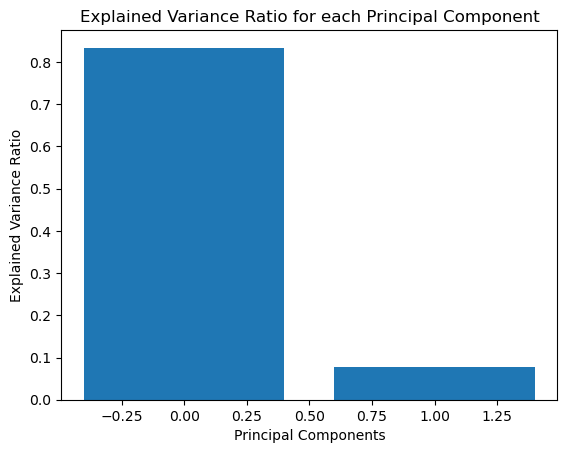

Principal Component 1:
Channel: 0.2282064617860256
Detergents_Paper: 0.04658945420484383
Grocery: 0.04396824274389594

Principal Component 2:
Fresh: 0.04210172150120026
Frozen: 0.036942133055617124
Delicassen: 0.0015574379684054431



In [32]:

components = pca.components_
explained_variance = pca.explained_variance_ratio_

plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for each Principal Component')
plt.show()

feature_names = df.columns
for i, component in enumerate(components):
    top_features = sorted(zip(component, feature_names), reverse=True)[:3]
    print(f"Principal Component {i+1}:")
    for feature in top_features:
        print(f"{feature[1]}: {feature[0]}")
    print()

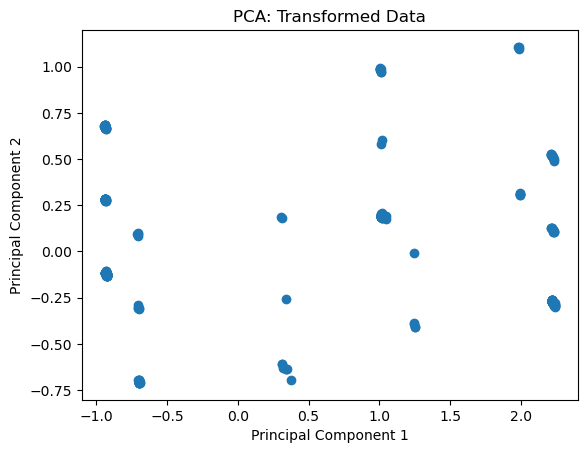

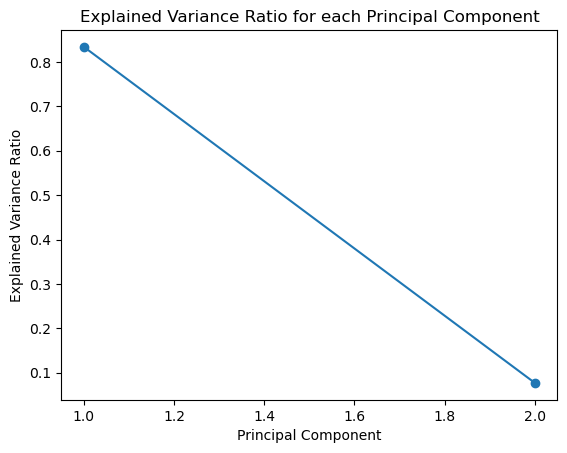

In [33]:
from sklearn.decomposition import PCA


n_components = 2
pca = PCA(n_components=n_components)

pca.fit(df)

transformed_data = pca.transform(df)

explained_variance_ratio = pca.explained_variance_ratio_

plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Transformed Data')
plt.show()

plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for each Principal Component')
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

**Cluster Analysis**:  By utilizing the K-means clustering algorithm, we were able to identify and group products with similar attributes into distinct clusters. These clusters offer valuable insights into the wholesale customers, enabling us to categorize them into different segments. For instance, we can identify high-spending customers, low-spending customers, or customers with specific purchasing patterns. This segmentation empowers businesses to customize their marketing strategies and offerings, effectively meeting the unique needs of each customer segment.

**Correlation Analysis**: 
The correlation analysis uncovered significant relationships between specific pairs of variables. Notably, a robust positive correlation was observed between the "Grocery" and "Detergents_Paper" variables. This finding indicates that customers who exhibit higher grocery purchases also tend to acquire more detergents and paper products. Gaining insights into these correlations enables us to better understand customer preferences and optimize product assortments and promotions accordingly. Such knowledge empowers businesses to make informed decisions that align with customer demands and maximize their overall effectiveness.

**Principal Components**: 
Principal components derived from PCA capture the highest amount of variance in the data by combining the original features. These components serve as new variables that are uncorrelated and offer a condensed representation of the dataset. Analyzing the weights and contributions of the original features to each principal component allows businesses to understand the fundamental factors that influence customer purchasing patterns. This insight into the key drivers of customer behavior can inform strategic decision-making and enable businesses to tailor their strategies and offerings to meet customer preferences effectively.

**Variance Explained**: 
PCA not only enables dimensionality reduction but also provides insights into the variance explained by each principal component. This information helps businesses make informed decisions about the trade-off between reducing complexity and retaining essential information. By selecting an appropriate number of principal components that account for a significant portion of the variance, businesses can effectively balance the reduction in complexity with the retention of valuable insights. This approach ensures that the resulting dataset maintains a meaningful representation of the original data while still reducing the overall dimensionality.